In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import csv


In [120]:
fileDir = "./measures/"
fileName = "soilMoistureSensor1"
extension = ".csv"
file = fileDir + fileName + extension
figureDir = "./measures/figures/"
figure = figureDir+fileName+".png"


In [144]:
fileDir = "./measures/"
fileName = "soilMoistureSensor2"
extension = ".csv"
file = fileDir + fileName + extension
figureDir = "./measures/figures/"
figure = figureDir+fileName+".png"


In [175]:
x_ = []
y_ = []
with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line = 0
    for row in csv_reader:
        if line == 1:
            x_ = row
        elif line == 2:
            y_ = row
        line += 1
print(x_)
print(y_)
x = np.array(x_, dtype=int)
y = np.array(y_, dtype=int)


['0', '50', '100', '150', '200']
['2896', '2166', '1561', '1341', '1317']


In [173]:
model = LinearRegression().fit(y,x)
r_sq = model.score(y,x)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.8714388058297887
intercept: 303.0585879213223
slope: [-0.10939478]


In [146]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")


predicted response:
[2652.8 2254.5 1856.2 1457.9 1059.6]


In [147]:
m = model.coef_
b = model.intercept_
y_pred2 =x*m + b
x_2 = (1535-b)/m
print(f"predicted response:\n{y_pred2}")
print(x_2)


predicted response:
[[2652.8]
 [2254.5]
 [1856.2]
 [1457.9]
 [1059.6]]
[140.3213658]


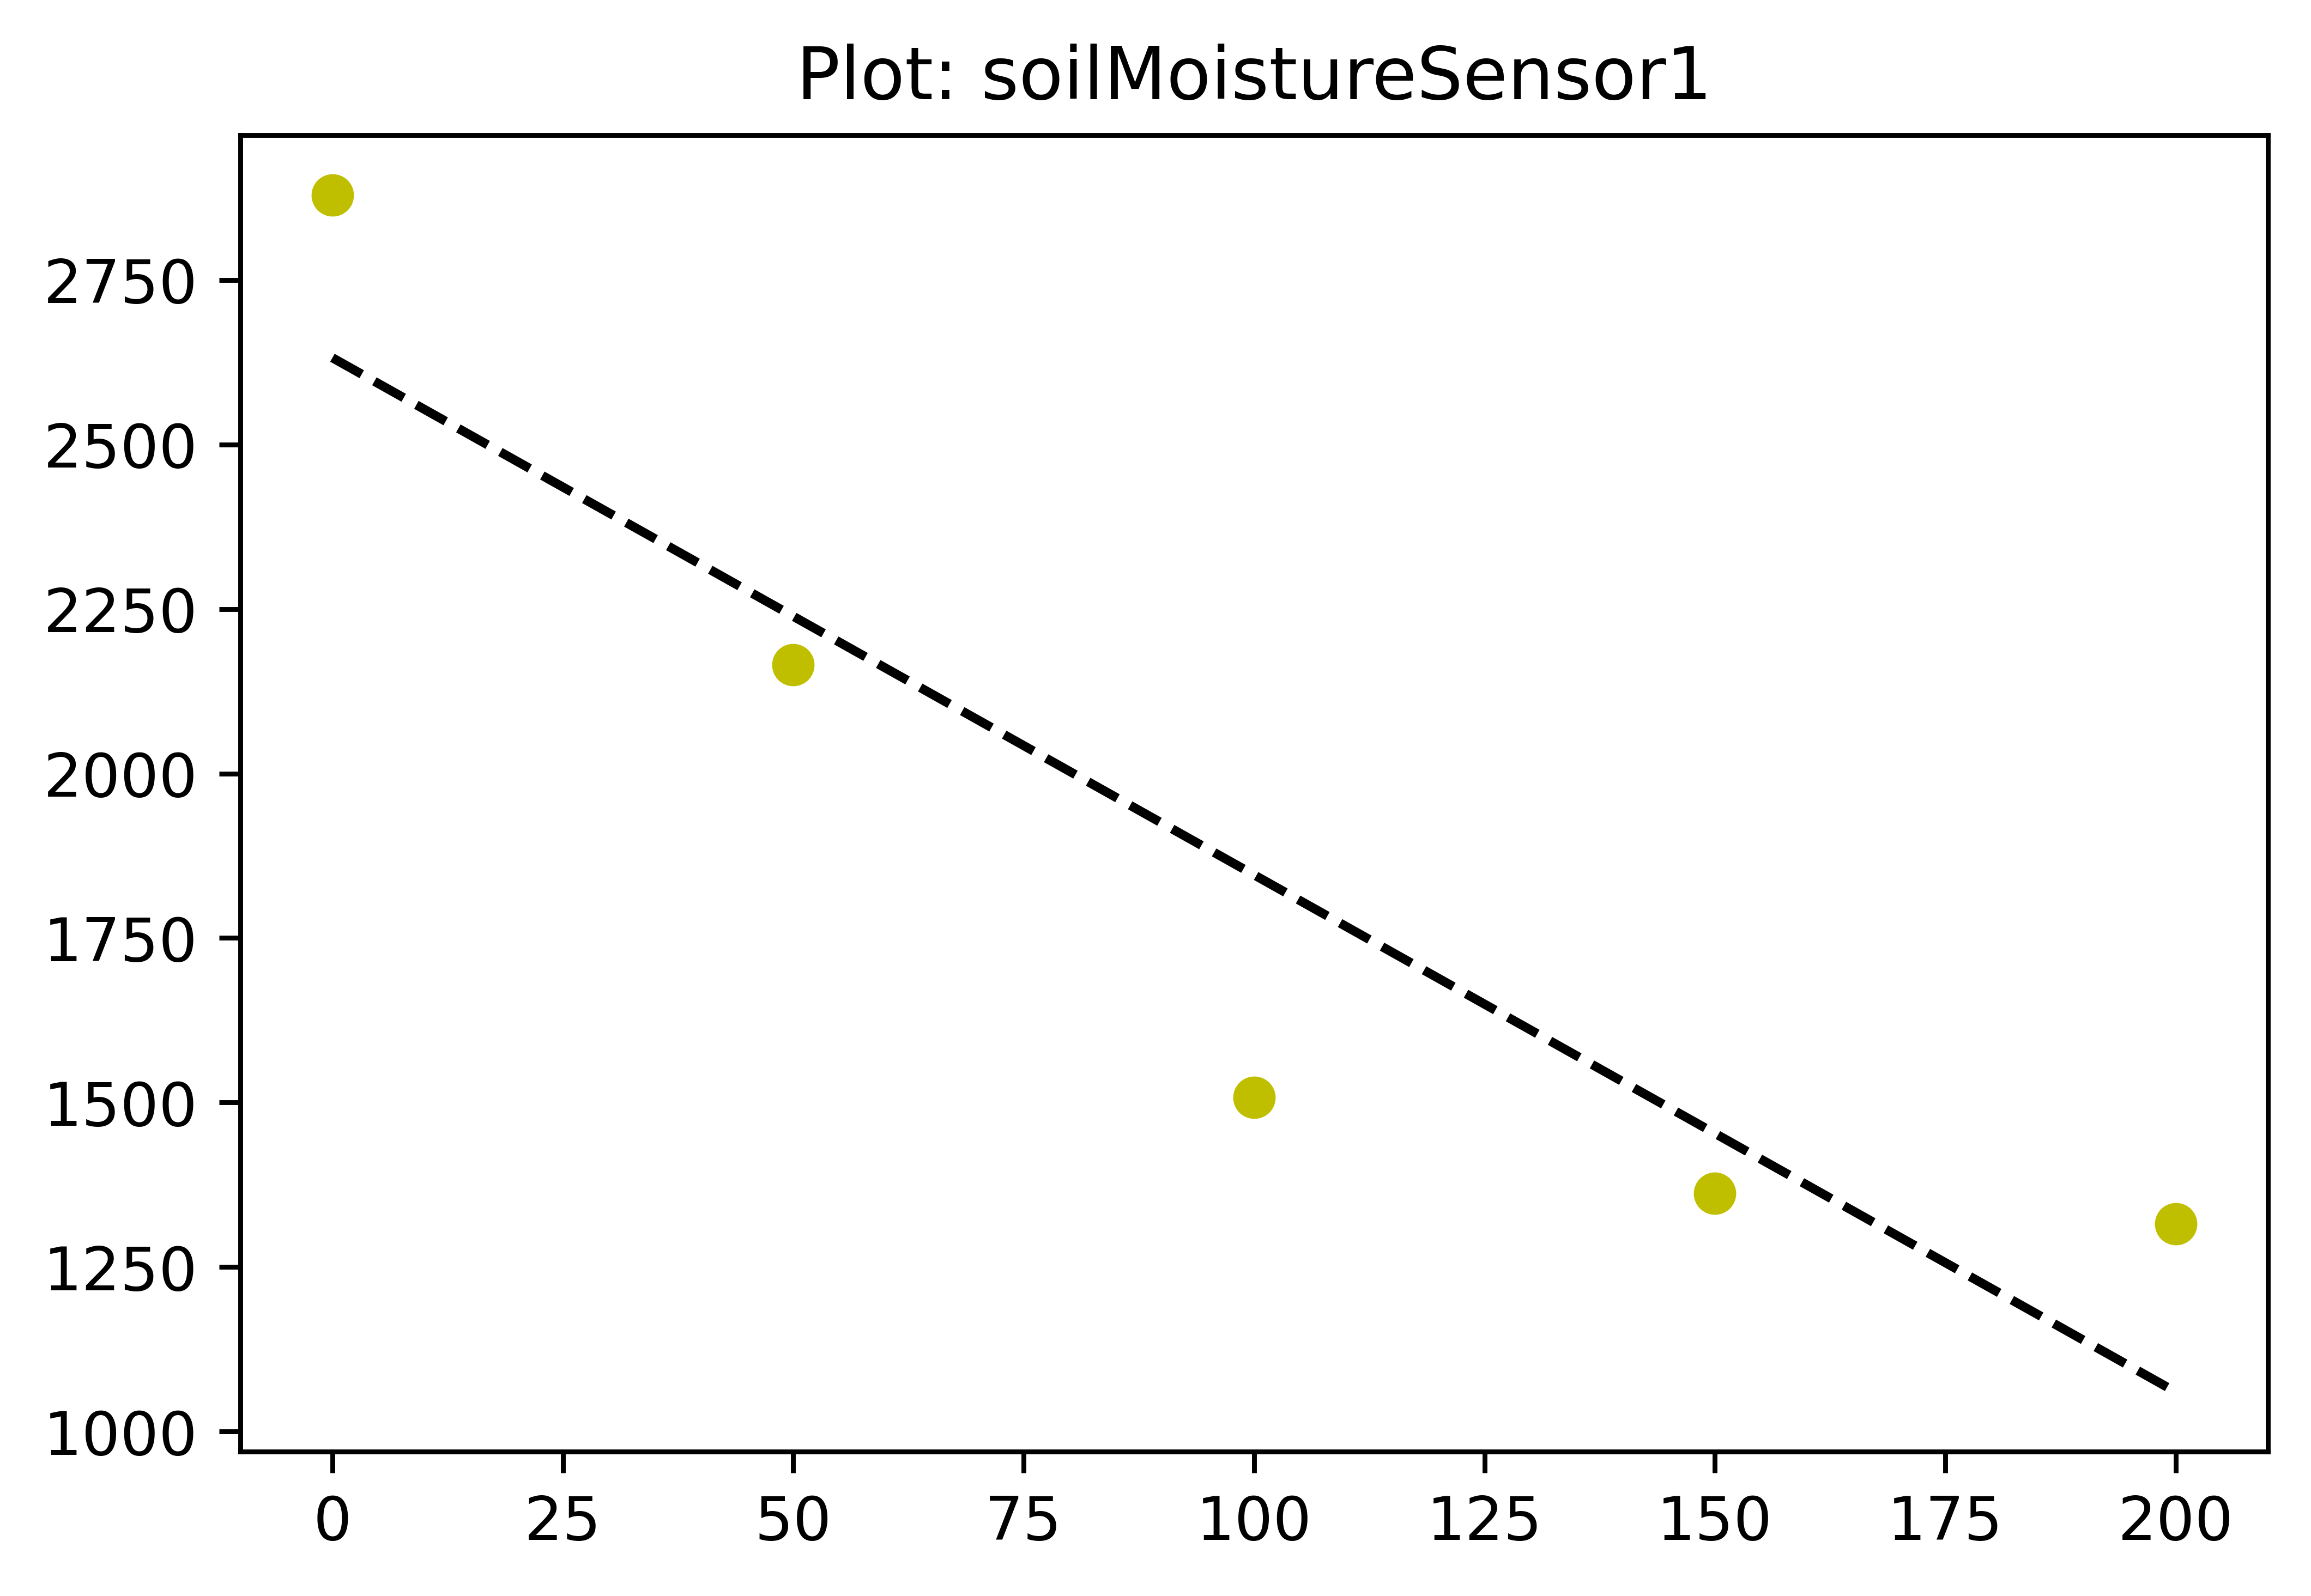

In [124]:
plt.figure(dpi=800)
plt.plot(x,y, 'yo', x, model.predict(x), '--k')
plt.title(f"Plot: {fileName}")
plt.savefig(figure)
plt.show()

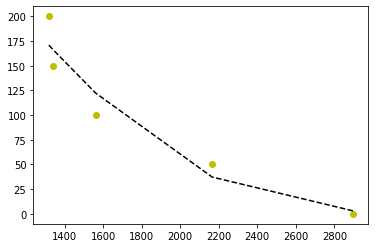

           2
7.026e-05 x - 0.4024 x + 579.4
r_sq: 0.9297290524250595
(0.00007026,-0.40244493,579.35602573)


In [211]:
model = np.poly1d(np.polyfit(y,x,2))

plt.plot(y,x, 'yo', y, model(y), '--k')

plt.show()
print(model)
r_sq = r2_score(x, model(y))
print(f"r_sq: {r_sq}")
coefs = model.coefficients
formattedOutput = f"({coefs[0]:.8f},{coefs[1]:.8f},{coefs[2]:.8f})"
print(formattedOutput)

In [177]:
print(model(1657))

105.41528929139747


In [210]:
modelString = str(model.c)
print(modelString)
string = "(0.00007,-0.40244,579.35603)"
res = string.strip("()").split(",")
a = float(res[0])
b = float(res[1])
c = float(res[2])
print(a)
print(b)
print(c)
measure = 1657
water = a*pow(measure,2) + b*measure + c
print(water)

[ 7.02604397e-05 -4.02444926e-01  5.79356026e+02]
7e-05
-0.40244
579.35603
104.70838000000003
